In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [3]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv 

--2022-01-05 05:49:35--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brixkogrmhan6ed/cab_rides.csv [following]
--2022-01-05 05:49:35--  https://www.dropbox.com/s/raw/brixkogrmhan6ed/cab_rides.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce42577f86618934e6f99dad1f6.dl.dropboxusercontent.com/cd/0/inline/BdKG0r-LPMCVENkVYPnkSbkKtQjz5fX9cmkD115rGRxBCd1H3jayWBuKu5BNOLbFz3v8NCy-tHFYcyXRV0vp1s1fzIUhsn1hzdyVF8KwoQUM7e6Qk7vdP7WPK49BFbZm-B4DE7yfONBBWFbirqBYhqk4/file# [following]
--2022-01-05 05:49:36--  https://uce42577f86618934e6f99dad1f6.dl.dropboxusercontent.com/cd/0/inline/BdKG0r-LPMCVENkVYPnkSbkKtQjz5fX9cmkD115rGRxBCd1H3jayWBuKu5BNOLbFz3v8NCy-tHFYcyXRV0vp1s1

In [4]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv 

--2022-01-05 05:49:38--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ncqb2ctkg7da11k/weather.csv [following]
--2022-01-05 05:49:38--  https://www.dropbox.com/s/raw/ncqb2ctkg7da11k/weather.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8d872407c10eb215bdaa8c555b.dl.dropboxusercontent.com/cd/0/inline/BdIot3KirFMWa3L0jJZnULdVy4H__441ppp_EnMN4IE8F8iAb18jku6aUijxAaJRCclg6_VnLlr2URrjU4A_JdnGvoK_Sc8Ewptblu8WLAVrenWooQXmpT1akjrSB61wZou09O4xZaVYbgAFRFm1M7-Y/file# [following]
--2022-01-05 05:49:39--  https://uc8d872407c10eb215bdaa8c555b.dl.dropboxusercontent.com/cd/0/inline/BdIot3KirFMWa3L0jJZnULdVy4H__441ppp_EnMN4IE8F8iAb18jku6aUijxAaJRCclg6_VnLlr2URrjU4A_JdnGvoK_S

Reduce memory function from Kaggle

In [5]:
def reduce_mem_usage(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


In [6]:
#Reading csv files
cab_data=pd.read_csv("/content/cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)
weather_data=pd.read_csv("/content/weather.csv")
weather_data=reduce_mem_usage(weather_data)

Memory usage after optimization is: 40.98 MB
Decreased by 22.5%
Memory usage after optimization is: 0.14 MB
Decreased by 62.5%


In [7]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.000000,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.000000,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.000000,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.000000,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [8]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [9]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [10]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.40625,Back Bay,1.0,1012.0,0.122803,1545003901,0.770020,11.250000
1,42.43750,Beacon Hill,1.0,1012.0,0.184570,1545003901,0.759766,11.320312
2,42.50000,Boston University,1.0,1012.0,0.108887,1545003901,0.759766,11.070312
3,42.12500,Fenway,1.0,1012.0,0.096924,1545003901,0.770020,11.093750
4,43.12500,Financial District,1.0,1012.0,0.178589,1545003901,0.750000,11.492188


In [11]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [12]:
#to convert time stamp into proper date and time
import datetime
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['datetime']=pd.to_datetime(weather_data['time_stamp'])

Shape of data

In [13]:
cab_data.shape

(693071, 11)

In [14]:
weather_data.shape

(6276, 9)

Description od Data

In [15]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.0,693071.0
mean,NaN,1.544046e+12,NaN,NaN
std,0.000000,6.891925e+08,0.0,0.0
min,0.020004,1.543204e+12,2.5,1.0
25%,1.280273,1.543444e+12,9.0,1.0
50%,2.160156,1.543737e+12,13.5,1.0
75%,2.919922,1.544828e+12,22.5,1.0
max,7.859375,1.545161e+12,97.5,3.0


In [16]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,inf,0.677734,inf,0.057648,1.543857e+09,0.764160,6.800781
std,6.019531,0.314453,12.875,0.100769,6.659340e+05,0.127319,3.632812
min,19.625000,0.000000,988.000,0.000200,1.543204e+09,0.449951,0.290039
25%,36.085938,0.439941,997.875,0.004902,1.543387e+09,0.669922,3.517090
50%,40.125000,0.779785,1007.500,0.014847,1.543514e+09,0.759766,6.570312
75%,42.843750,0.970215,1018.500,0.060913,1.544691e+09,0.890137,9.921875
max,55.406250,1.000000,1035.000,0.780762,1.545159e+09,0.990234,18.187500


Merging both Data for modelling

In [17]:
a=pd.concat([cab_data,weather_data])

In [18]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
a['day']=a.datetime.dt.day
a['hour']=a.datetime.dt.hour

In [20]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,1,0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,1,0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,1,0


In [21]:
a.fillna(0,inplace=True)

In [22]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.71875,North Station,0.890137,1000.5,0.0,0.959961,1.519531,1,0
6272,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.84375,Northeastern University,0.879883,1000.5,0.0,0.959961,1.540039,1,0
6273,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.81250,South Station,0.890137,1000.5,0.0,0.959961,1.540039,1,0
6274,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.78125,Theatre District,0.890137,1000.5,0.0,0.959961,1.540039,1,0
6275,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.68750,West End,0.890137,1000.5,0.0,0.959961,1.519531,1,0


In [23]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [24]:
#to calculate the number of data in each cab type
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


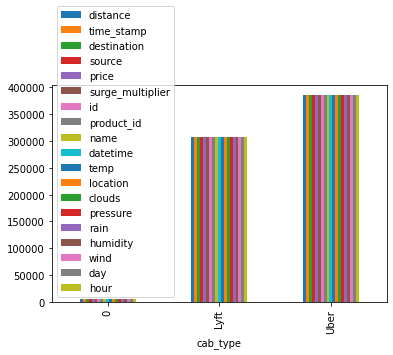

In [25]:
#bargraph for the same
a.groupby('cab_type').count().plot.bar()

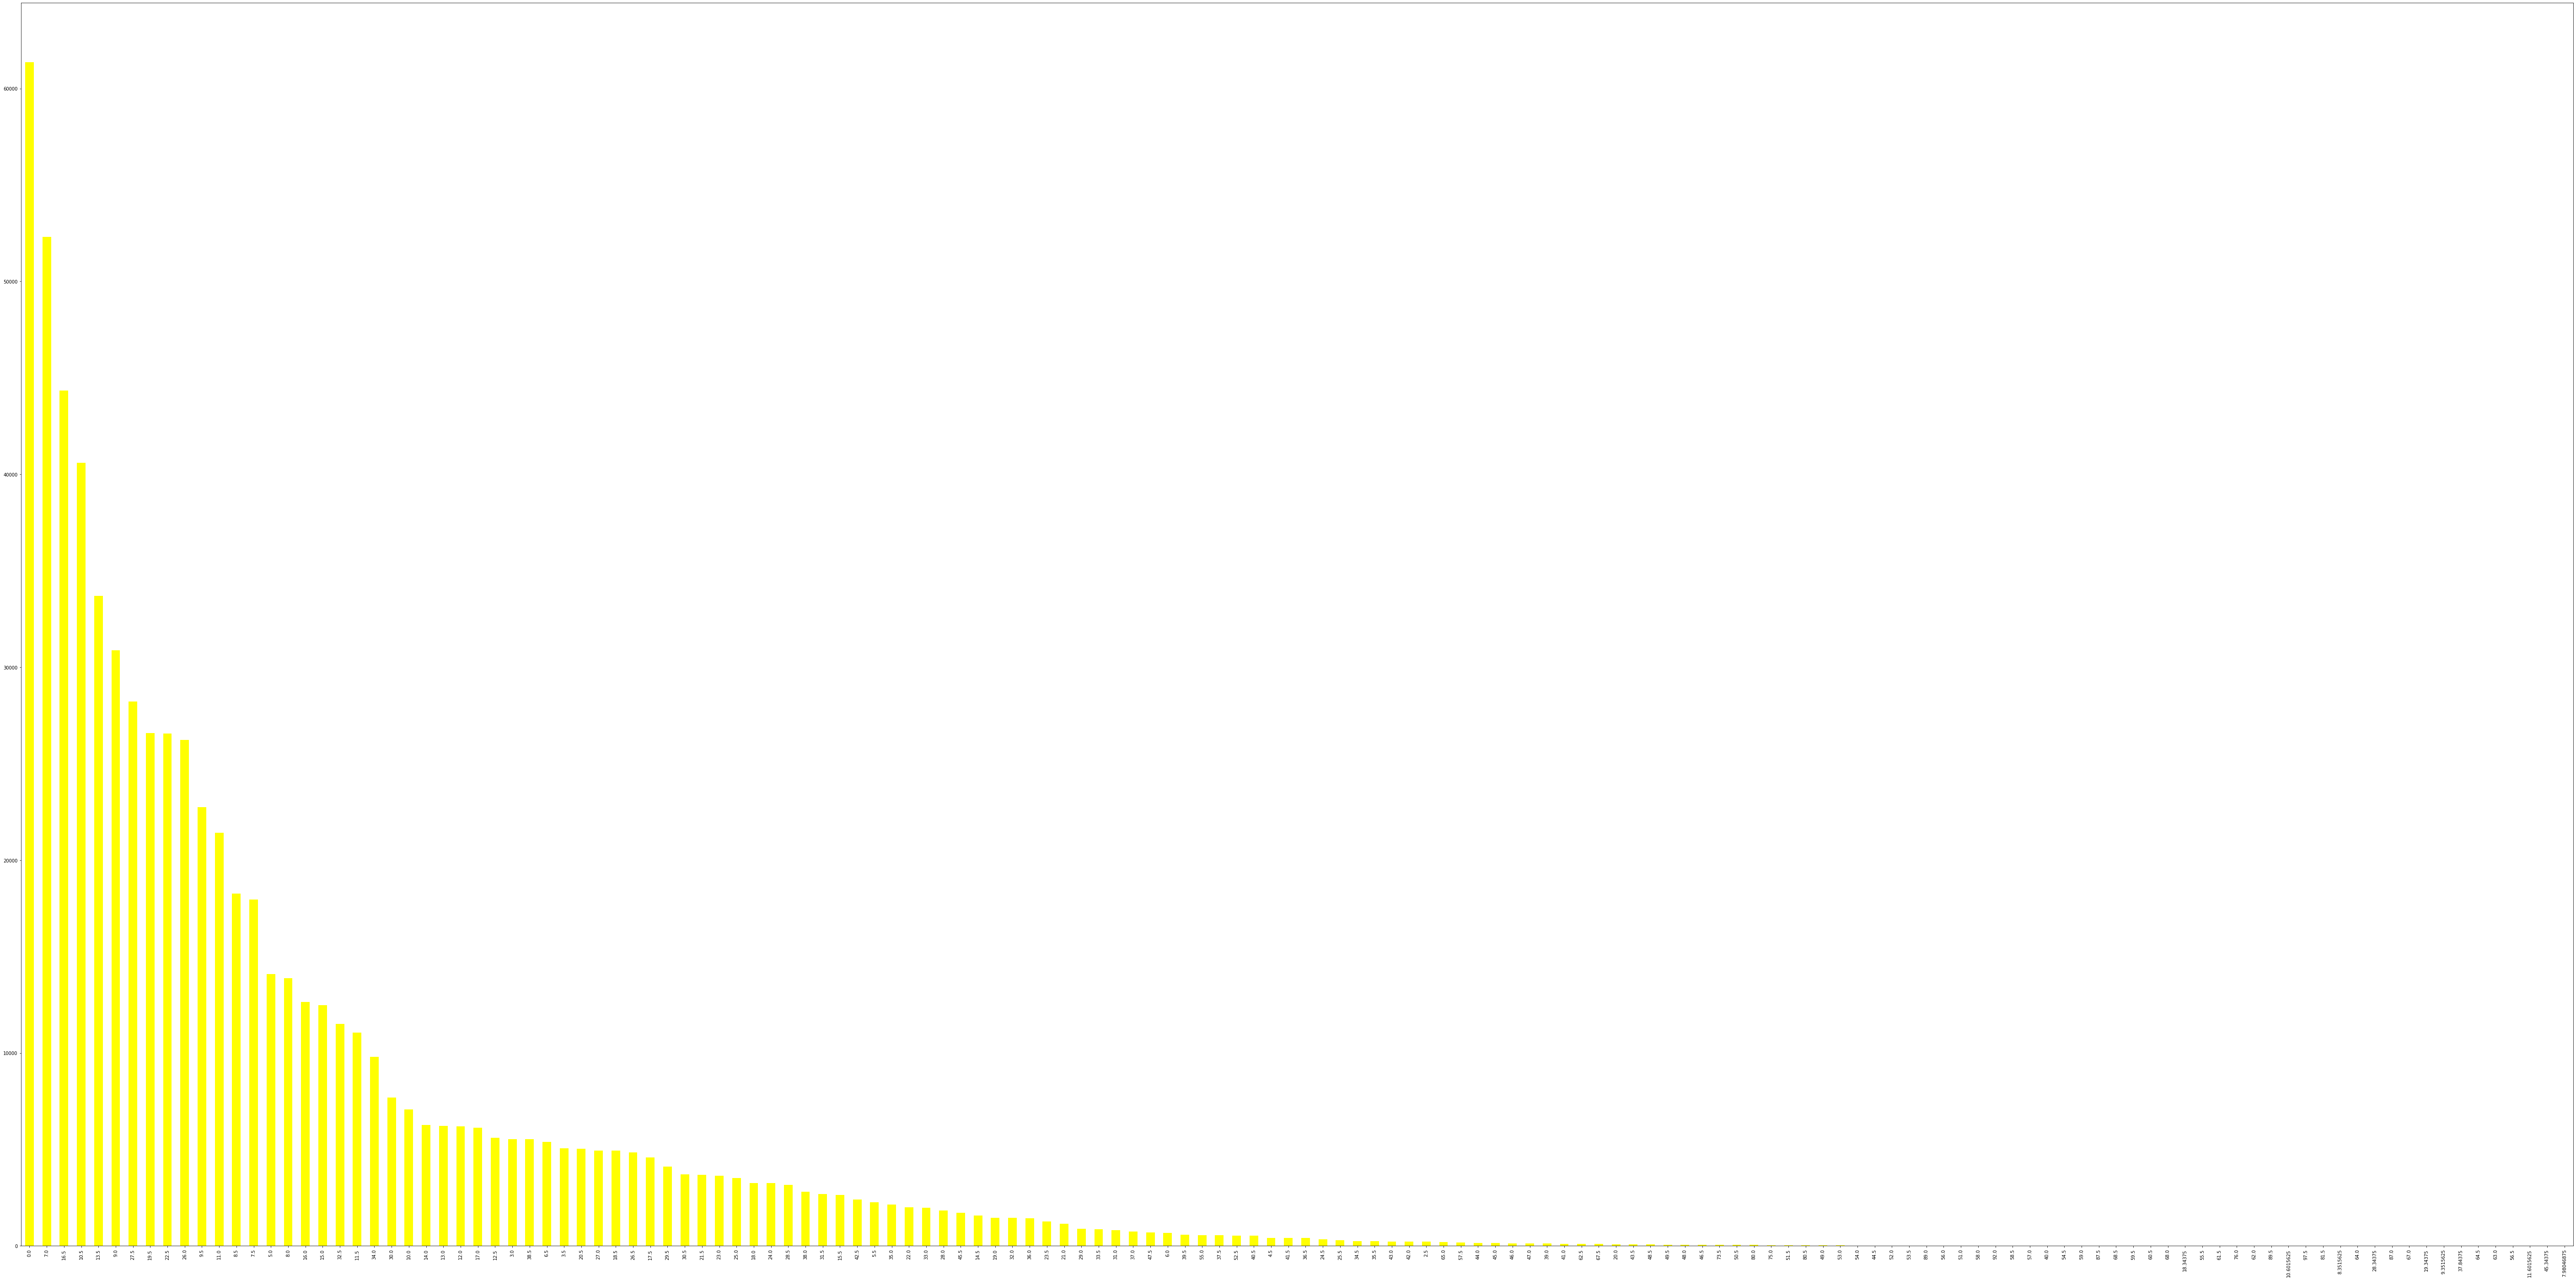

In [26]:
#to calculate price 
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='yellow')

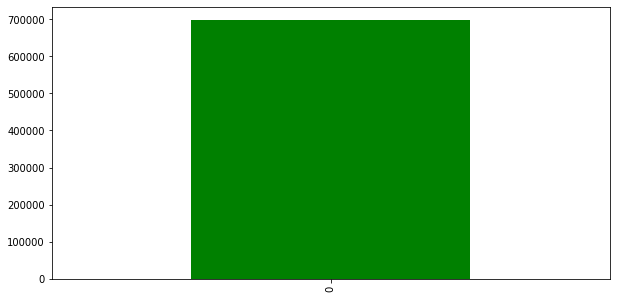

In [27]:
#to predict peak hours
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

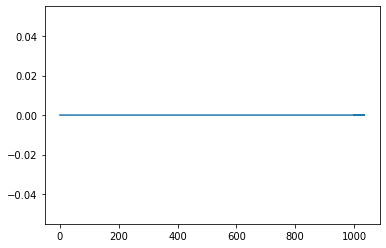

In [28]:
#graph for price vs hour
import matplotlib.pyplot as plt
x=a['pressure']
y=a['hour']
plt.plot(x,y)
plt.show()

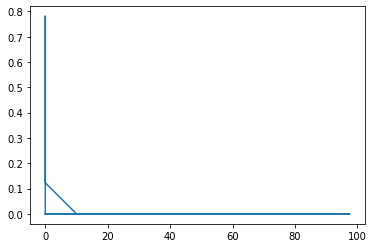

In [29]:
#to check how rain affects the prices
x=a['price']
y=a['rain']
plt.plot(x,y)
plt.show()

In [30]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [32]:
x1=a[{'distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds'}]
y1=a['price']

In [35]:
#splitting data into training and testing sets using scikit learn
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [36]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [38]:
prediction=linear.predict(y_train)
prediction

array([32.5459531 , 14.75718428, 16.81492884, ..., 11.82962017,
       11.85447216, 13.22878706])

In [39]:
df=pd.DataFrame({'Actual': y_test,'Predicted': prediction})
df

,Actual,Predicted
81607,42.5,32.545953
354,0.0,14.757184
471801,32.5,16.814929
407645,27.5,10.480157
474760,27.5,10.556577
...,...,...
538489,7.5,10.708796
579511,13.5,15.517655
5421,9.0,11.829620
279982,8.0,11.854472


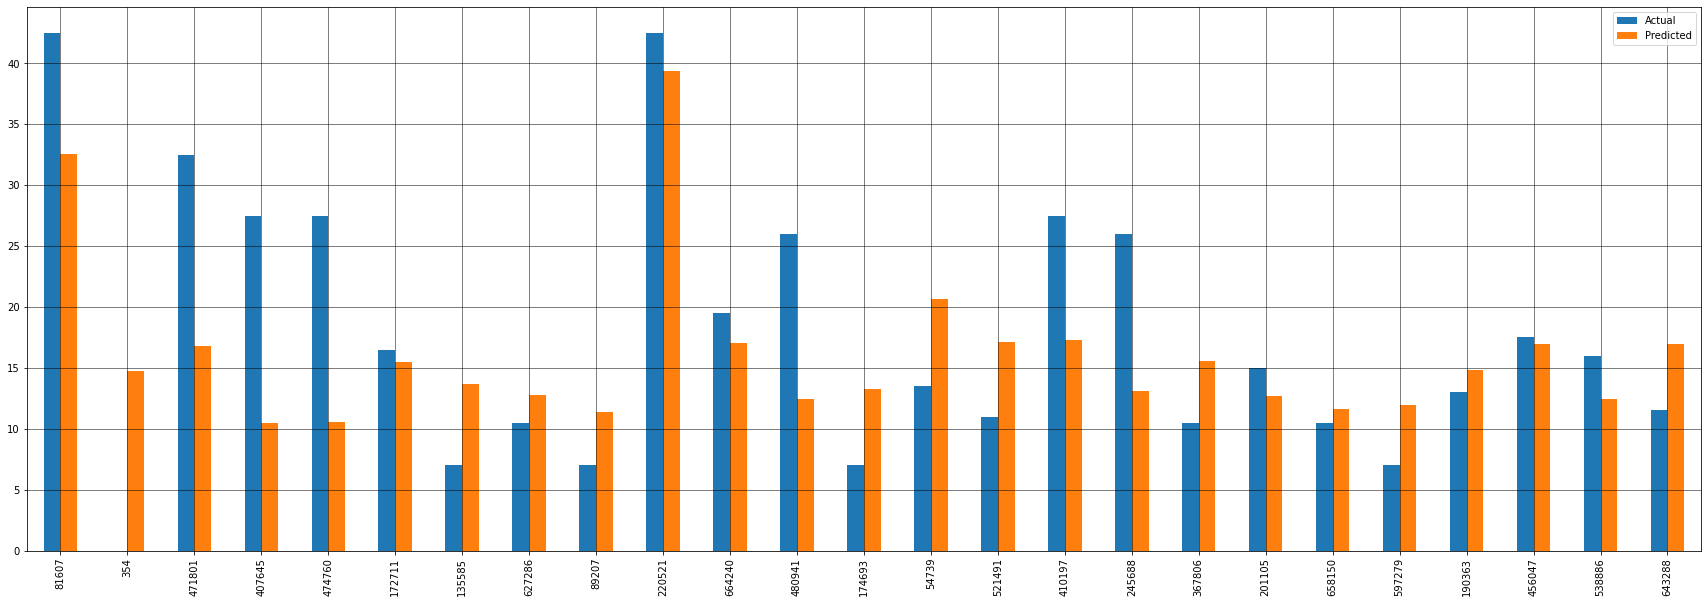

In [40]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(30,10))
plt.grid(which='major',linestyle='-',linewidth=0.5,color='k')
plt.grid(which='minor',linestyle='-.',linewidth=0.5,color='c')
plt.show()